In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scienceplots as scp

import numpy as np
import torch

matplotlib.rcParams['figure.figsize'] = (20, 6)

import sys
sys.path.append("..")

from argparse import Namespace
from main import main, parse_args
from utils.plotting import *
from utils.analysis import process_outputs, get_change_responses, get_omission_responses

from utils.data import load_results_files

import warnings
warnings.filterwarnings('ignore')

import os

plt.rcParams['text.usetex'] = True

In [12]:
figure_S = 6

In [13]:
prefixes = {
    1: 'perception_action',
    2: 'perception_only',
    3: 'no_energy',
    4: 'no_pred',
    5: 'no_inh',
    6: 'no_disinh'
}

In [14]:
# load results for the full model
args, change, omission, progress = load_results_files("../results/full_responses", prefixes[figure_S])
args = Namespace(**args)

In [15]:
exc_responses = {
    1: ['sigma_q', 'h', 'h2', 'value', 'action_value', 'rl_gain'],
    2: [k for k in change['familiar'].keys() if k not in ['sigma_p', 'temp_error', 'frac_active', 'mu_q']],
    3: [k for k in change['familiar'].keys() if k not in ['theta', 'frac_active', 'mu_q', 'rl_gain']],
    4: [k for k in change['familiar'].keys() if k not in ['theta', 'sigma_p', 'temp_error', 'frac_active', 'mu_q']],
    5: [k for k in change['familiar'].keys() if k not in ['theta', 'frac_active', 'mu_q', 'rl_gain']],
    6: [k for k in change['familiar'].keys() if k not in ['theta', 'z', 'frac_active', 'mu_q']],
}

In [16]:
titles = {
    'mu_p': [r"SST ($\mu_p$)", (52, 91, 49)],
    'sigma_p': [r"VIP ($\sigma_p$)", (21, 83, 137)],
    'sigma_q': [r'PV', (170, 123, 55)],
    'theta': [r"SST ($\theta$)", (52, 91, 49)],
    'z': [r"Excitatory ($z$)", (149, 36, 32)] ,
    'temp_error': [r"Exc. Prediction Error ($z_{\rm{err}}$)", (149, 36, 32)],
    'h': [r"Higher Area B ($h_B$)", (89, 69, 131)],
    'h2': [r"Higher Area A ($h_A$)", (69, 46, 131)],
    'value': [r"Reward Area", (103, 70, 142)],
    'action_value': [r"Reward Prediction ($v^{\rm{action}}$)", (0, 0, 0)],
    'rl_gain': [r"RL Gain Signal ($\kappa$)", (103, 70, 142)]
}

#### Change Responses

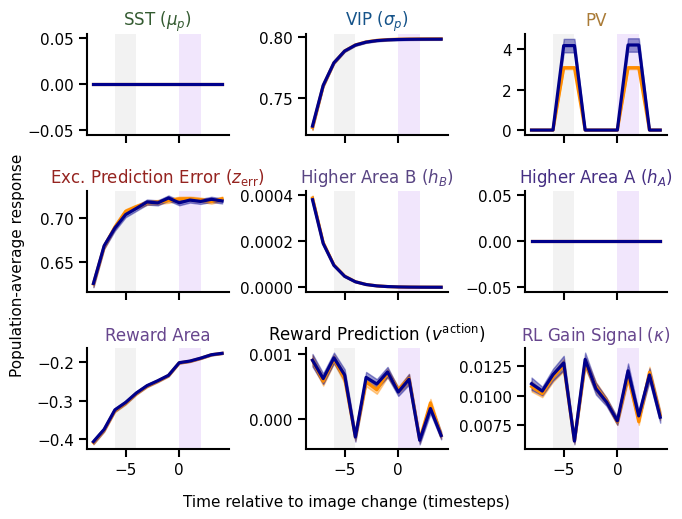

In [17]:
max_width = 7

with plt.style.context(['nature', 'notebook']):

    change_fig, axs = plt.subplots(3, 3, figsize=(max_width, 5), sharex=True)
    axs = axs.flatten()

    change_fig.supylabel('Population-average response', fontsize=11)

    plt.tight_layout(pad=1.2, h_pad=4) #pad=5, h_pad=6)

    for i, pop in enumerate(exc_responses[figure_S]):
        ax = axs[i] #plt.subplot(4, 3, i+1)
        _ = plot_trial_responses(args, ax, change['familiar'][pop], change['novel'][pop], normalize=False, lw=2.3)
        _ = ax.set_title(titles[pop][0], color=tuple(np.array(titles[pop][1])/255), fontsize=12)

        ax.spines[['right', 'top']].set_visible(False)
        ax.locator_params('y', nbins=3)

        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.tick_params(width=1.5, labelsize=11)

    change_fig.supxlabel('Time relative to image change (timesteps)', fontsize=11)
    plt.subplots_adjust(bottom=0.13, left=0.13)


In [18]:
change_fig.savefig(f"../figures/supp/S{figure_S}.pdf", dpi=600, bbox_inches="tight", pad_inches=0)